# Testing non-supervised learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA
from qbstyles import mpl_style; mpl_style(dark=True)

In [3]:
df_original = pd.read_csv('../../data/raw/detection_data.csv')
df_original = df_original.drop(['Unnamed: 7','Unnamed: 8'], axis=1)
df_original = df_original.rename(columns={'Output (S)':'output'})
df = df_original.copy()
df

,output,Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [4]:
df['output'].value_counts()

0    6505
1    5496
Name: output, dtype: int64

In [5]:
X = df.drop('output', axis=1)
Y = df['output']

In [6]:
X_ss = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_ss

,Ia,Ib,Ic,Va,Vb,Vc
0,-0.469800,0.100092,0.459871,0.127013,-1.801934,1.719221
1,-0.341900,0.091557,0.310270,0.264243,-1.714387,1.492370
2,-0.256855,0.084968,0.211875,0.376966,-1.649138,1.314993
3,-0.229659,0.081010,0.182602,0.421006,-1.640633,1.262629
4,-0.187183,0.075952,0.135550,0.490846,-1.610619,1.162666
...,...,...,...,...,...,...
11996,-0.193421,0.181888,0.008473,0.242352,-1.500218,1.295942
11997,-0.192391,0.179114,0.010471,0.269379,-1.509073,1.278218
11998,-0.191323,0.176335,0.012427,0.296324,-1.517533,1.260171
11999,-0.190217,0.173551,0.014341,0.323179,-1.525595,1.241805


## Testing k-means

### With "k" clusters

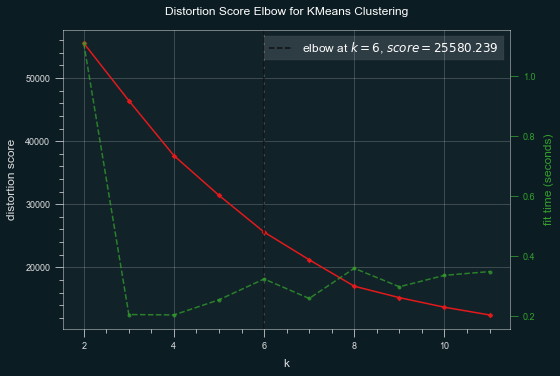

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,12))
elbow.fit(X_ss)
elbow.show()

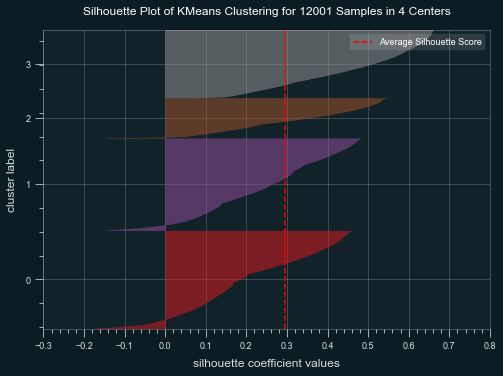

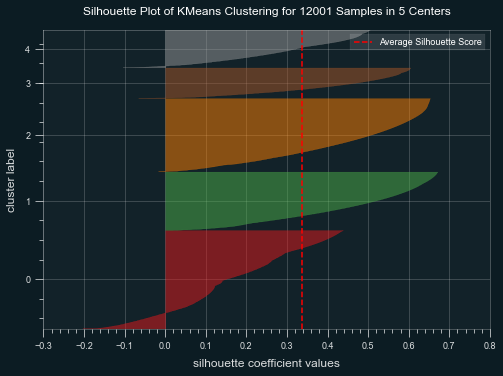

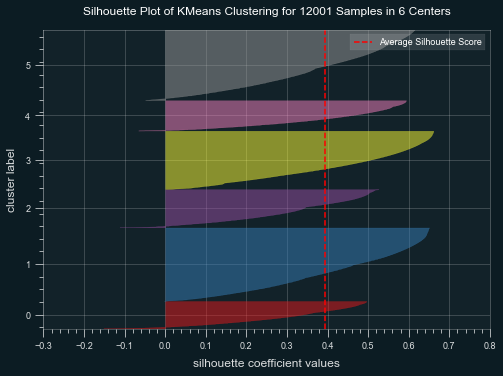

In [6]:
for i in range(4,7):
  kmeans_i = KMeans(n_clusters=i)
  silhouette = SilhouetteVisualizer(kmeans_i)
  silhouette.fit(X_ss)
  silhouette.show()

### With 2 clusters

c:\Users\Vinicius\Desktop\data_science\bootcamp\projeto_final\electrical_fault\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


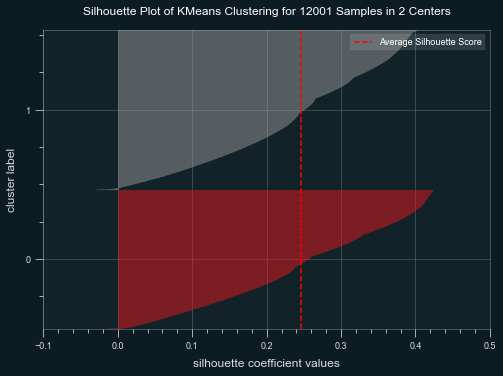

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12001 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
k2 = KMeans(2)
k2.fit(X_ss)
clusters_k2 = k2.labels_
df['clusters_k2'] = clusters_k2
SilhouetteVisualizer(k2).fit(X_ss).show()

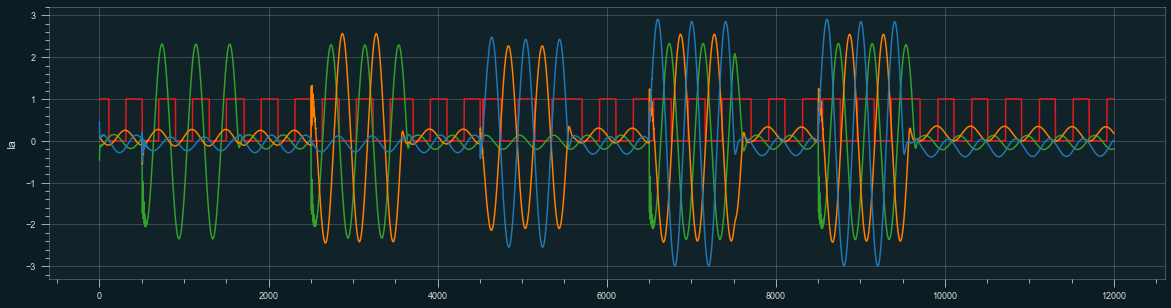

In [8]:
plt.figure(figsize=(20,5))
sns.lineplot(data=clusters_k2)
for i in X_ss.iloc[:,0:3].columns:
    sns.lineplot(data=X_ss[i])

### With 3 clusters

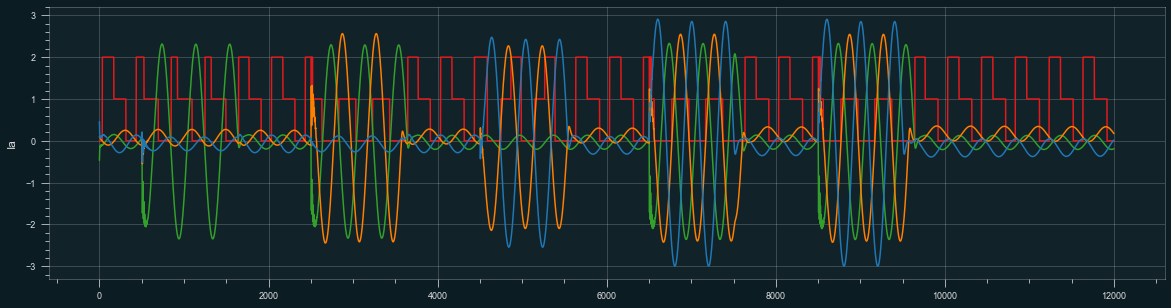

In [12]:
k3 = KMeans(3)
k3.fit(X_ss)
clusters_k3 = k3.labels_
df['clusters_k3'] = clusters_k3
plt.figure(figsize=(20,5))
sns.lineplot(data=clusters_k3)
for i in X_ss.iloc[:,0:3].columns:
    sns.lineplot(data=X_ss[i])

## Testing DBSCAN

In [8]:
epsilon = 0.1 # epsilon = 0.1
samples = 50 # samples = 10
db = DBSCAN(eps=epsilon, min_samples=samples)
db.fit(X_ss)
df['clusters_db'] = db.labels_
df['clusters_db'].value_counts()

 0    6320
-1    5681
Name: clusters_db, dtype: int64

In [9]:
Y_hat = -db.labels_
print(classification_report(Y, Y_hat, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.97156   0.98558      6505
           1    0.96744   1.00000   0.98345      5496

    accuracy                        0.98458     12001
   macro avg    0.98372   0.98578   0.98451     12001
weighted avg    0.98509   0.98458   0.98460     12001



Text(0.5, 1.0, 'Confusion Matrix from Training Set')

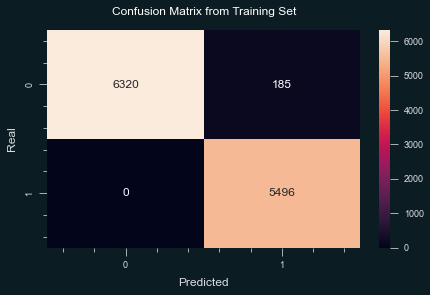

In [15]:
cmf = confusion_matrix(Y, Y_hat)
plt.figure(figsize=(7,4))
sns.heatmap(cmf, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Training Set')

Text(0.5, 1.0, 'Confusion Matrix from Training Set')

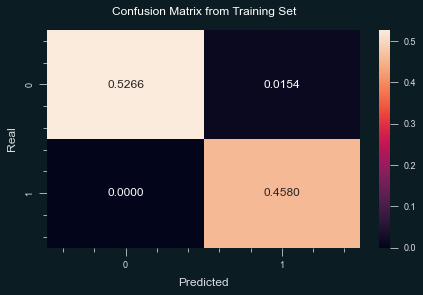

In [14]:
cmf = confusion_matrix(Y, Y_hat, normalize='all')
plt.figure(figsize=(7,4))
sns.heatmap(cmf, annot=True, fmt='.4f', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Training Set')

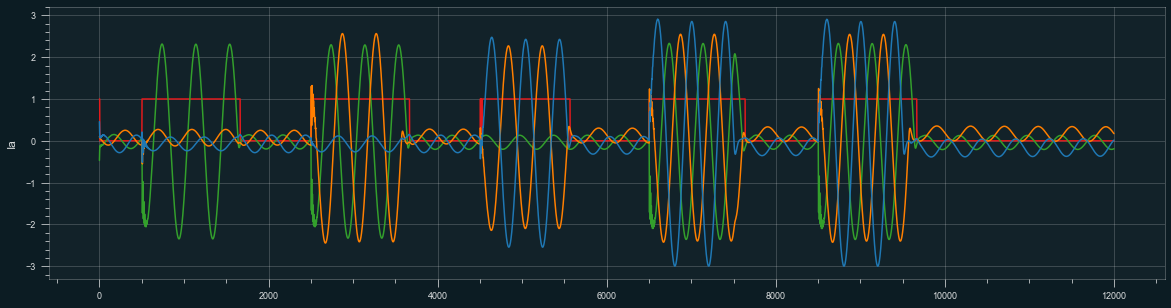

In [308]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Y_hat)
for i in X_ss.iloc[:,0:3].columns:
    sns.lineplot(data=X_ss[i])

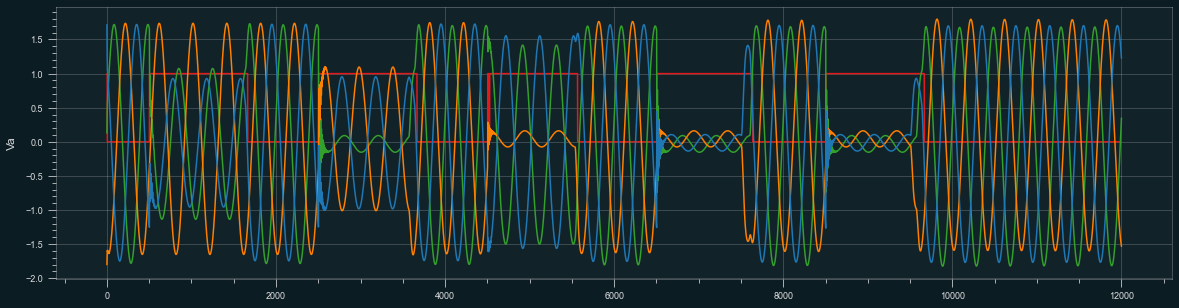

In [309]:
plt.figure(figsize=(20,5))
sns.lineplot(data=Y_hat)
for i in X_ss.iloc[:,3:6].columns:
    sns.lineplot(data=X_ss[i])